# Some keywords

Projection and Transform keyword arguments:

- The projection argument determines what the plot looks like.
- The transform argument tells Cartopy what coordinate system your data are defined in.

for more example(s): https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html

# Imports

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap


%matplotlib inline
import numpy as np
import xarray as xr

import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\data")

import warnings
warnings.filterwarnings('ignore')

# Basic Map

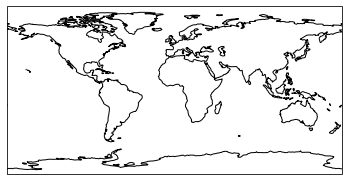

In [2]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()


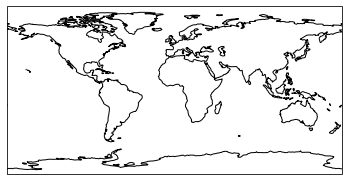

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.coastlines()

# Changing plot size 

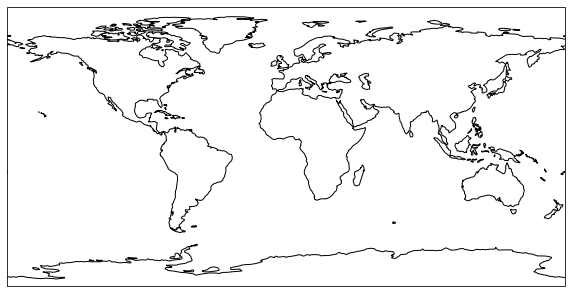

In [4]:
fig = plt.figure(figsize=(10,14))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.coastlines()

# Adding feature to maps

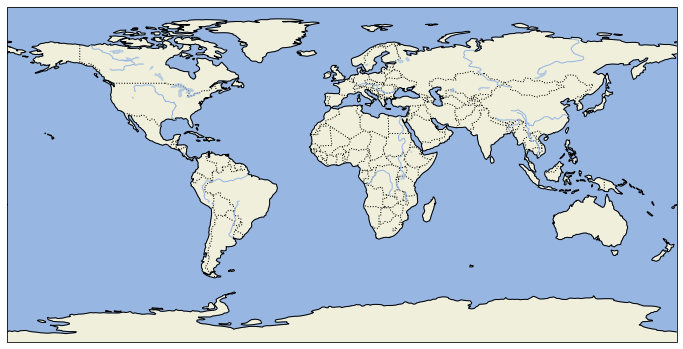

In [5]:
# import cartopy.feature as cfeature

plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Projection with subplots

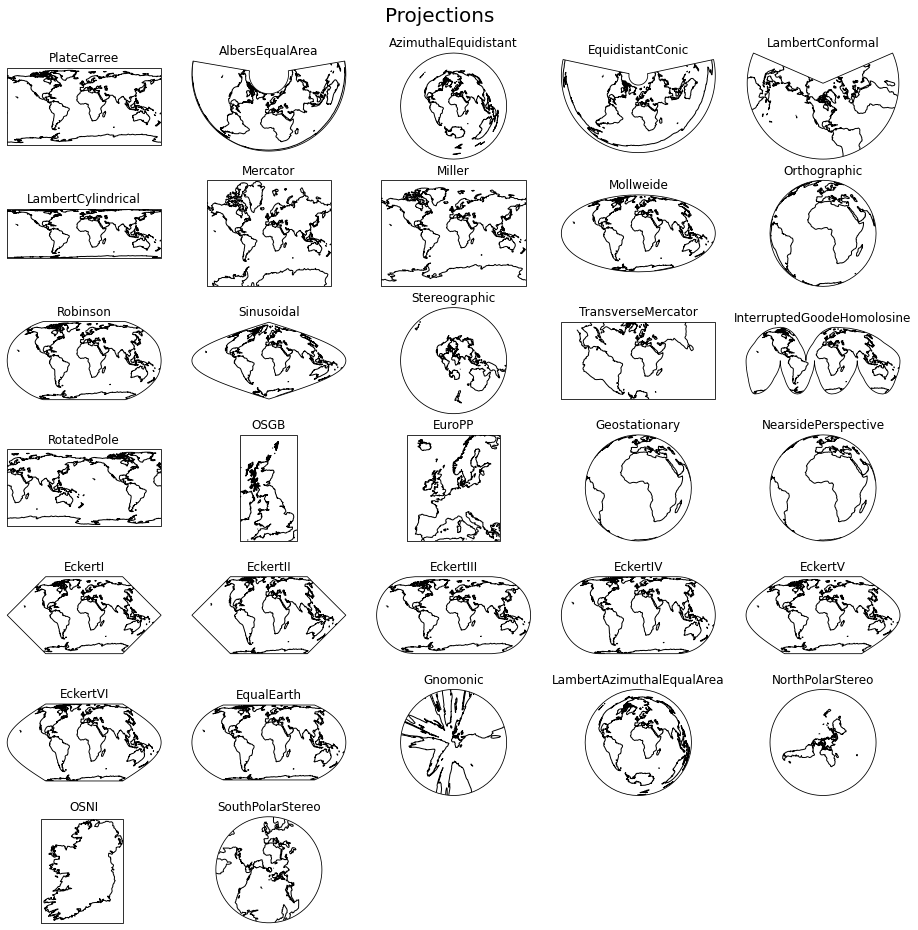

In [6]:
fig = plt.figure(figsize=(16,16))
fig.suptitle('Projections', fontsize=20, y=0.92)

projections = {'PlateCarree': ccrs.PlateCarree(), 
               'AlbersEqualArea': ccrs.AlbersEqualArea(), 
               'AzimuthalEquidistant': ccrs.AzimuthalEquidistant(), 
               'EquidistantConic': ccrs.EquidistantConic(), 
               'LambertConformal': ccrs.LambertConformal(), 
               'LambertCylindrical': ccrs.LambertCylindrical(), 
               'Mercator': ccrs.Mercator(), 
               'Miller': ccrs.Miller(), 
               'Mollweide': ccrs.Mollweide(), 
               'Orthographic': ccrs.Orthographic(), 
               'Robinson': ccrs.Robinson(), 
               'Sinusoidal': ccrs.Sinusoidal(), 
               'Stereographic': ccrs.Stereographic(), 
               'TransverseMercator': ccrs.TransverseMercator(), 
               'InterruptedGoodeHomolosine': ccrs.InterruptedGoodeHomolosine(),
               'RotatedPole': ccrs.RotatedPole(), 
               'OSGB': ccrs.OSGB(), 
               'EuroPP': ccrs.EuroPP(), 
               'Geostationary': ccrs.Geostationary(), 
               'NearsidePerspective': ccrs.NearsidePerspective(), 
               'EckertI': ccrs.EckertI(), 
               'EckertII': ccrs.EckertII(), 
               'EckertIII': ccrs.EckertIII(), 
               'EckertIV': ccrs.EckertIV(), 
               'EckertV': ccrs.EckertV(), 
               'EckertVI': ccrs.EckertVI(), 
               'EqualEarth': ccrs.EqualEarth(), 
               'Gnomonic': ccrs.Gnomonic(),
               'LambertAzimuthalEqualArea': ccrs.LambertAzimuthalEqualArea(), 
               'NorthPolarStereo': ccrs.NorthPolarStereo(), 
               'OSNI': ccrs.OSNI(), 
               'SouthPolarStereo': ccrs.SouthPolarStereo()}

for index, projection in enumerate(projections.items()):
    ax = fig.add_subplot(7, 5, index+1, projection=projection[1])
    ax.coastlines()
    ax.set_title(projection[0])


# Shapefile Intergration

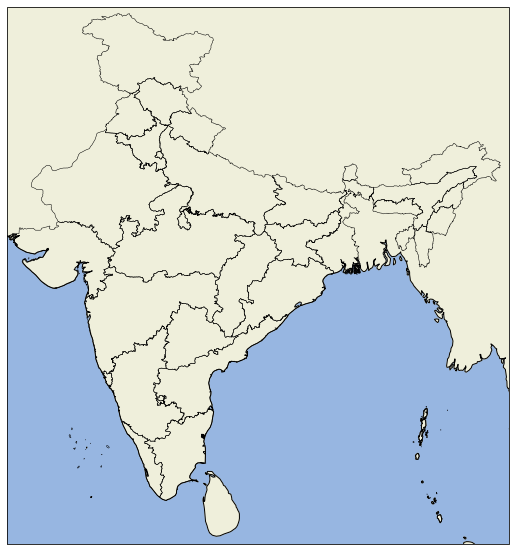

In [7]:
filename = r'./India-shapefiles/India-States.shp'
shape_feature = ShapelyFeature(Reader(filename).geometries(),ccrs.PlateCarree(),
                              linewidth = 0.5, facecolor = 'none',
                              edgecolor = 'black')

fig = plt.figure(figsize=(9,11))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68.04999,97.95001, 5.5, 37.45], ccrs.PlateCarree())

ax.add_feature(shape_feature)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.coastlines()

# Xarray Integration

In [5]:
dat = xr.open_dataset('LIS_HIST_201409220000.d01.nc')
dat

<xarray.Dataset>
Dimensions:           (east_west: 300, north_south: 320, time: 1)
Coordinates:
  * time              (time) datetime64[ns] 2014-09-22
Dimensions without coordinates: east_west, north_south
Data variables:
    lat               (north_south, east_west) float32 ...
    lon               (north_south, east_west) float32 ...
    Streamflow_tavg   (north_south, east_west) float32 ...
    RiverDepth_tavg   (north_south, east_west) float32 ...
    FloodedFrac_tavg  (north_south, east_west) float32 ...
    SWS_tavg          (north_south, east_west) float32 ...
Attributes: (12/15)
    missing_value:           -9999.0
    NUM_SOIL_LAYERS:         1
    SOIL_LAYER_THICKNESSES:  1.0
    title:                   LIS land surface model output
    institution:             NASA GSFC
    source:                  model_not_specified
    ...                      ...
    comment:                 website: http://lis.gsfc.nasa.gov/
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:   5.55
    SOUTH_WEST_CORNER_LON:   68.05
    DX:                      0.1
    DY:                      0.1

# Initial plot from netcdf file only using matplotlib

In [8]:
colormap = ['#FFFFFF','#3288bd','#66c2a5','#e6f598','#fee08b','#fdae61','#f46d43','#d53e4f']

cmap = colors.ListedColormap(colormap)

ncolors = len(colormap)
color_array = plt.get_cmap(cmap)(range(ncolors))
color_array[0:,-1] = np.linspace(0.6,1.0,ncolors)

map_object = LinearSegmentedColormap.from_list(name='cmap_alpha', colors=color_array)
plt.register_cmap(cmap=map_object)

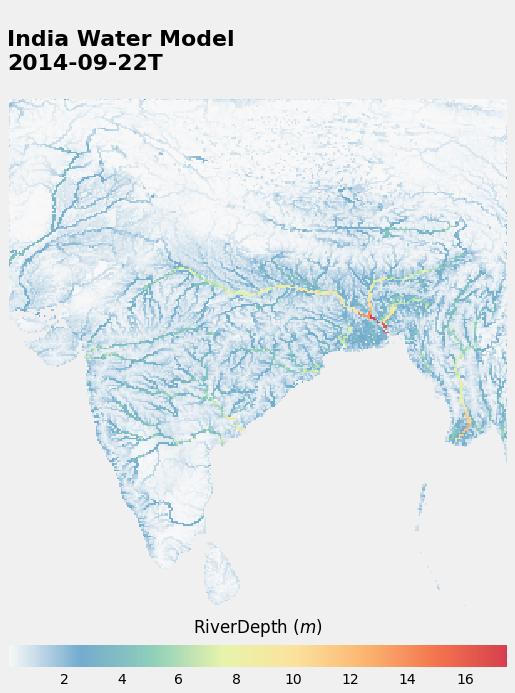

In [10]:
import matplotlib.colors as colors

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,11))

im= xr.plot.imshow(dat['RiverDepth_tavg'],cmap = 'cmap_alpha', add_labels=False, add_colorbar=False)

cb = plt.colorbar(im, orientation="horizontal", pad=0.05)
cb.set_label(r'RiverDepth ($m$)', labelpad=-70, y =0.5)
plt.grid(False)
plt.axis('off')
plt.title('\nIndia Water Model \n' + str(dat['time'].values)[2:13]+'\n',
          loc='left',fontdict= {'weight': 'bold','size':22})
plt.show()

# Final plot using Xarray, Cartopy, Matplotlib

Text(0.0, 1.0, '\nIndia Water Model\n2014-09-22T\n')

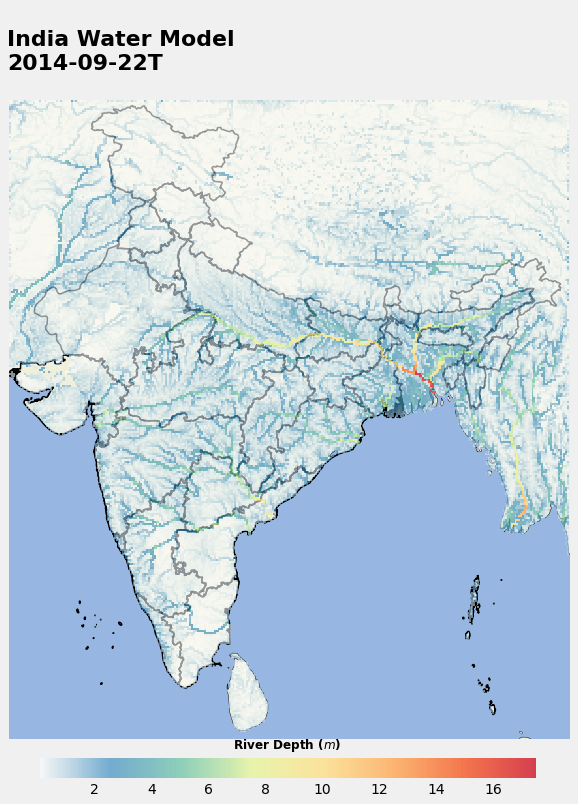

In [11]:
fig = plt.figure(figsize=(9,11))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68.04999,97.95001, 5.5, 37.45], ccrs.PlateCarree())
    
cbar_ax = fig.add_axes([0.127, 0.02, 0.77, 0.03]) #colorbar axes position

#Overlaying of administrative boundries

filename = r'./India-shapefiles/India-States.shp'
shape_feature = ShapelyFeature(Reader(filename).geometries(),ccrs.PlateCarree(),
                              linewidth = 1.5, facecolor = 'none',
                              edgecolor = 'black')
ax.add_feature(shape_feature)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND,edgecolor='black')
    
im = xr.plot.imshow(dat['RiverDepth_tavg'], 
                        ax = fig.add_subplot(projection= None),
                        cmap='cmap_alpha',
                        add_labels = False, add_colorbar =False)

ax.set_aspect('auto') # aspect ratio for the plot

#Add colorbar specs
cb=plt.colorbar(im, cax=cbar_ax, orientation="horizontal", pad =-1.169)
cb.set_label(r'River Depth ($m$)', labelpad=-60, y =0.5,fontdict = {'weight': 'bold', 'size':12})
plt.grid(True)
plt.axis('off')
plt.title('\nIndia Water Model\n'+ str(dat['time'].values)[2:13]+'\n' ,loc='left',fontdict={'weight': 'bold','size':22})